# 文本部分大作业（文本分词、表达、分类和检索）
### 2018202147 崔冠宇

In [1]:
import numpy as np
import pandas as pd

## 1.预处理

### 1.1 加载有标签数据

In [2]:
# 加载短信内容
def my_read_txt(file, is_labeled = True, names = None):
    with open(file, 'r', encoding = 'utf-8') as f:
        if is_labeled:
            texts = [[int(line.strip()[0]), line.strip()[2:]] for line in f]
        else:
            texts = [line.strip() for line in f]
        return pd.DataFrame(texts, columns = names)
# 带标签
df_wlabel = my_read_txt('短信数据/带标签短信.txt', names = ['标签', '内容'])
df_wlabel

,标签,内容
0,0,商业秘密的秘密性那是维系其商业价值和垄断地位的前提条件之一
1,1,南口阿玛施新春第一批限量春装到店啦   春暖花开淑女裙、冰蓝色公主衫 ...
2,0,带给我们大常州一场壮观的视觉盛宴
3,0,有原因不明的泌尿系统结石等
4,0,23年从盐城拉回来的麻麻的嫁妆
...,...,...
799995,0,助排毒缓解痛经预防子宫肌瘤&amp
799996,0,这是今年首次启动I级防台应急响应
799997,0,丽江下飞机时迎接我们的是凉风
799998,0,费了半天劲各种找关系终于联系上心仪公司的内部人


In [3]:
# 观察数据分布
df_wlabel['标签'].value_counts()

0    720000
1     80000
Name: 标签, dtype: int64

In [4]:
# 垃圾短信抽样
df_wlabel[df_wlabel['标签'] == 1].sample(n = 15)

,标签,内容
426878,1,/:rose/:rose美女节快乐～红妆日化高堡子分店给美女们送优惠啦/::Bx.春季新品全...
548471,1,音乐在线KTV欢迎您的来电，本KTV为您提供包厢、唱K、休闲娱乐、餐饮等服务，订厢热线：xx...
494989,1,迎十五庆三八，哈密季候风 在x月x日---x月x日，春款满xxx立减xxx元，冬装x折，欲购从速哦
382839,1,格力龙卷风再起，羊年开春第一抢！不用找熟人不用找朋友不用找关系，x月x日--x月xx日万人空...
406210,1,( 新 _葡_ 京 ) 充 * 存 * 立 * 送 xoo% 地址：xx xx xx.com
489269,1,月x日（妇女节）期间年利率低至x%！收到本短信的客户，您就有机会快贷哦！马上登录建行网银，点...
755593,1,基本不变
441192,1,博克曼衣柜开春厂家大促销，衣柜最低低至xxx元/每平方，机会难得，错过在等一年.地址：红星美...
324665,1,欢迎您致电苹果艺术酒店管理有限公司星空影院。本公司主营酒店餐饮娱乐业。本店地址连州市东门中路...
757654,1,x?xx--诚信到家、诚实到价！ 搬新家、住新房--买门窗、我只选派雅门窗！ 好门窗一辈子、...


In [5]:
# 普通短信抽样
df_wlabel[df_wlabel['标签'] == 0].sample(n = 15)

,标签,内容
56511,0,交管部门允许车主临时就近停入小街巷过渡
415327,0,连云都变热热的~~~289
48955,0,Mozilla对此感到非常不满
521414,0,其中6台与事故同型号的电梯全部停运
98196,0,请您赐教C0045是什么故障影响行车安全吗谢谢
303012,0,主要从事腾讯企业邮箱、微信企业号等的销售工作
225288,0,是不是应该有旅游局的有关人员来治理呢
215008,0,针对从0岁到3岁的婴幼儿潜能启发
316422,0,咨询电话13247097146
738597,0,某陈姓沙皮再不来南京我要疯了


### 1.2 数据清洗——去重

In [6]:
# 去除重复短信
df_wlabel.drop_duplicates(subset = None, inplace = True)
df_wlabel = df_wlabel.reset_index(drop = True)
df_wlabel

,标签,内容
0,0,商业秘密的秘密性那是维系其商业价值和垄断地位的前提条件之一
1,1,南口阿玛施新春第一批限量春装到店啦   春暖花开淑女裙、冰蓝色公主衫 ...
2,0,带给我们大常州一场壮观的视觉盛宴
3,0,有原因不明的泌尿系统结石等
4,0,23年从盐城拉回来的麻麻的嫁妆
...,...,...
786595,0,助排毒缓解痛经预防子宫肌瘤&amp
786596,0,这是今年首次启动I级防台应急响应
786597,0,丽江下飞机时迎接我们的是凉风
786598,0,费了半天劲各种找关系终于联系上心仪公司的内部人


In [7]:
import jieba

# 分词函数
# 传入列, 停用词文件
def word_cut(column, file_stopwords = 'hit_stopwords.txt'):
    result = []
    if file_stopwords is not None:
        with open(file_stopwords) as f:
            stoplist = f.read();
    for s in column:
        words_list = []
        bagofwords = jieba.cut(s, cut_all = False)
        if file_stopwords is not None:
            for word in bagofwords:
                if word not in stoplist:
                    words_list.append(word)
        else:
            for word in bagofwords:
                words_list.append(word)
        result.append((' '.join(words_list)))
    return pd.Series(result)

### 初次运行请取消注释

In [8]:
# 由于查找停用词加分词很慢, 先做初步分词, 保存csv, 后续直接加载节省时间
# 处理 stopwords
#parsed_df_wlabel = pd.DataFrame(df_wlabel['标签'], columns = ['标签'])
#parsed_df_wlabel['内容'] = word_cut(df_wlabel['内容'])
#parsed_df_wlabel

In [9]:
#parsed_df_wlabel.to_csv('短信数据(分词后)/带标签短信(分词后).csv', index = False)

In [10]:
# 不处理 stopwords
#parsed_df_wlabel_wstop = pd.DataFrame(df_wlabel['标签'], columns = ['标签'])
#parsed_df_wlabel_wstop['内容'] = word_cut(df_wlabel['内容'], file_stopwords = None)
#parsed_df_wlabel_wstop.to_csv('短信数据(分词后)/带标签短信(分词后, 含停用词).csv', index = False)

## 2. 文本表达与分类

### 2.1 朴素贝叶斯-MultinomialNB

### 2.1.1 特征提取

In [11]:
# 注意: 因为分词后会有空内容, 需要处理一下
train_parsed_df = pd.read_csv('短信数据(分词后)/带标签短信(分词后).csv')
train_parsed_df['内容'].fillna('', inplace = True)
train_parsed_df

,标签,内容
0,0,商业秘密 秘密性 维系 商业价值 垄断 地位 前提条件
1,1,南口 阿玛施 新春 第一批 限量 春装 店    春暖花开 淑女 裙 冰 蓝色 公主 ...
2,0,带给 大 常州 一场 壮观 视觉 盛宴
3,0,原因 不明 泌尿系统 结石
4,0,23 盐城 拉回来 麻麻 嫁妆
...,...,...
786595,0,助 排毒 缓解 痛经 预防 子宫 肌瘤 amp
786596,0,这是 今年 首次 启动 I 级 防台 应急 响应
786597,0,丽江 飞机 迎接 凉风
786598,0,费 半天 劲 找 关系 终于 联系 心仪 公司 内部


In [12]:
# 分测试集
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    train_parsed_df['内容'], train_parsed_df['标签'], 
    test_size = 0.15, random_state = 0)

In [13]:
# 特征提取
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# 训练集文本特征提取
vectorizer = CountVectorizer()
X_train_termcounts = vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_termcounts)

# 测试集进行文本特征提取
X_test_termcounts  = vectorizer.transform(X_test) 
X_test_tfidf = tfidf_transformer.transform(X_test_termcounts)

### 2.1.2 模型训练及评估

In [14]:
# 建立朴素贝叶斯分类器并进行训练
from sklearn.naive_bayes import MultinomialNB, GaussianNB
MNBclf = MultinomialNB().fit(X_train_tfidf, y_train)

#### 我认为，在垃圾短信分类的情景中，对于正常信息要同时关注准确度(precision)，
#### 和召回率(recall)，因为我们不能“错杀”用户的正常短信；
#### 对于垃圾短信，准确度尽量要高，同样是不能“错杀”正常短信；
#### 但我们可以允许漏掉一些，那么对于召回率要求相对较弱

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# 训练集上的评估
y_train_predicted = MNBclf.predict(X_train_tfidf)
print(classification_report(y_train, y_train_predicted))

# 测试集上的评估
y_test_predicted = MNBclf.predict(X_test_tfidf)
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    601412
           1       0.98      0.91      0.94     67198

    accuracy                           0.99    668610
   macro avg       0.99      0.95      0.97    668610
weighted avg       0.99      0.99      0.99    668610

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    106048
           1       0.98      0.88      0.93     11942

    accuracy                           0.99    117990
   macro avg       0.98      0.94      0.96    117990
weighted avg       0.99      0.99      0.99    117990



### 2.1.3 对比不去除停用词的效果
#### 我同时看了一下不去除停用词的预测效果, 发现不去除停用词的结果稍差.

In [16]:
# 看看不去掉停用词的训练效果
train_parsed_df = pd.read_csv('短信数据(分词后)/带标签短信(分词后, 含停用词).csv')
train_parsed_df['内容'].fillna('', inplace = True)

X_train, X_test, y_train, y_test = train_test_split(
    train_parsed_df['内容'], train_parsed_df['标签'], 
    test_size = 0.15, random_state = 0)

# 训练集文本特征提取
vectorizer = CountVectorizer()
X_train_termcounts = vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_termcounts)

# 测试集进行文本特征提取
X_test_termcounts  = vectorizer.transform(X_test) 
X_test_tfidf = tfidf_transformer.transform(X_test_termcounts)

classifier = MultinomialNB().fit(X_train_tfidf, y_train)

# 训练集上的评估
y_train_predicted = classifier.predict(X_train_tfidf)
print(classification_report(y_train, y_train_predicted))

# 测试集上的评估
y_test_predicted = classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    601412
           1       0.98      0.91      0.94     67198

    accuracy                           0.99    668610
   macro avg       0.99      0.95      0.97    668610
weighted avg       0.99      0.99      0.99    668610

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    106048
           1       0.98      0.88      0.93     11942

    accuracy                           0.99    117990
   macro avg       0.98      0.94      0.96    117990
weighted avg       0.99      0.99      0.99    117990



### 2.2 朴素贝叶斯-GaussianNB
#### 效果较差, 不如 MultinominalNB

In [17]:
train_parsed_df = pd.read_csv('短信数据(分词后)/带标签短信(分词后).csv')
train_parsed_df['内容'].fillna('', inplace = True)

X_train, X_test, y_train, y_test = train_test_split(
    train_parsed_df['内容'], train_parsed_df['标签'], 
    test_size = 0.15, random_state = 0)

# 训练集文本特征提取
vectorizer = CountVectorizer()
X_train_termcounts = vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_termcounts)

# 测试集进行文本特征提取
X_test_termcounts  = vectorizer.transform(X_test) 
X_test_tfidf = tfidf_transformer.transform(X_test_termcounts)

In [18]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

# GaussianNB 不接受稀疏矩阵, 尝试SVD降维
svd = TruncatedSVD(5)
normalizer = Normalizer(copy = False)
lsa = make_pipeline(svd, normalizer) 
X_train_new = lsa.fit_transform(X_train_tfidf)
X_test_new = lsa.transform(X_test_tfidf)

In [19]:
GNBclf = GaussianNB().fit(X_train_new, y_train)
# 训练集上的评估
y_train_predicted = GNBclf.predict(X_train_new)
print(classification_report(y_train, y_train_predicted))

# 测试集上的评估
y_test_predicted = GNBclf.predict(X_test_new)
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95    601412
           1       0.57      0.90      0.70     67198

    accuracy                           0.92    668610
   macro avg       0.78      0.91      0.83    668610
weighted avg       0.95      0.92      0.93    668610

              precision    recall  f1-score   support

           0       0.99      0.92      0.95    106048
           1       0.57      0.90      0.70     11942

    accuracy                           0.92    117990
   macro avg       0.78      0.91      0.83    117990
weighted avg       0.95      0.92      0.93    117990



### 2.3 KNN
#### 好于 GaussianNB, 但弱于 MultinominalNB

In [20]:
# KNN模型
from sklearn.neighbors import KNeighborsClassifier

KNNclf = KNeighborsClassifier()
KNNclf.fit(X_train_new, y_train)

# 训练集上的评估
y_train_predicted = KNNclf.predict(X_train_new)
print(classification_report(y_train, y_train_predicted))

# 测试集上的评估
y_test_predicted = KNNclf.predict(X_test_new)
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    601412
           1       0.89      0.86      0.87     67198

    accuracy                           0.98    668610
   macro avg       0.94      0.92      0.93    668610
weighted avg       0.97      0.98      0.97    668610

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    106048
           1       0.83      0.81      0.82     11942

    accuracy                           0.96    117990
   macro avg       0.90      0.89      0.90    117990
weighted avg       0.96      0.96      0.96    117990



### 2.4 决策树
#### 效果略弱于 KNN, 但是训练快

In [21]:
from sklearn.tree import DecisionTreeClassifier

DTclf = DecisionTreeClassifier(max_depth = 10, min_samples_split = 2)
DTclf.fit(X_train_new, y_train)

# 训练集上的评估
y_train_predicted = DTclf.predict(X_train_new)
print(classification_report(y_train, y_train_predicted))

# 测试集上的评估
y_test_predicted = DTclf.predict(X_test_new)
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    601412
           1       0.83      0.82      0.83     67198

    accuracy                           0.97    668610
   macro avg       0.91      0.90      0.90    668610
weighted avg       0.97      0.97      0.97    668610

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    106048
           1       0.81      0.80      0.81     11942

    accuracy                           0.96    117990
   macro avg       0.89      0.89      0.89    117990
weighted avg       0.96      0.96      0.96    117990



### 2.5 未标记短信预测
#### 通过比较我们可以选出一个最好的分类模型 MultinominalNB，后续用它进行预测

In [22]:
train_parsed_df = pd.read_csv('短信数据(分词后)/带标签短信(分词后).csv')
train_parsed_df['内容'].fillna('', inplace = True)

# 训练集文本特征提取
vectorizer = CountVectorizer()
X_train_termcounts = vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_termcounts)

# 测试集进行文本特征提取
X_test_termcounts  = vectorizer.transform(X_test) 
X_test_tfidf = tfidf_transformer.transform(X_test_termcounts)
# 建立朴素贝叶斯分类器并进行训练
from sklearn.naive_bayes import MultinomialNB, GaussianNB
MNBclf = MultinomialNB().fit(X_train_tfidf, y_train)

In [23]:
df_wolabel = my_read_txt('短信数据/不带标签短信.txt', is_labeled = False, names = ['内容'])
# 去除重复短信
df_wolabel.drop_duplicates(subset = None, inplace = True)
df_wolabel = df_wolabel.reset_index(drop = True)
df_wolabel

,内容
0,.x月xx日推出凭证式国债x年期x.xx.xx%，x年期x.xx%到期一次还本付息。真情邮政...
1,x强度等级水泥的必要性和可行性进行深入研究
2,Don’tSellaProduct
3,以上比赛规则由江苏科技大学教职工摄影协会负责解释
4,坐12个小时飞机身体已经疲惫不堪
...,...
198936,之前国内amazon看到有说买到假货
198937,无锡市金羿杭金融服务有限公司产品大纲1
198938,融券改为T+1限制日内回转交易
198939,康大预诊只要你用心做只要下个软件问医生三个问题一个个问还可以发展下家就能赚钱很简单不要交什么...


### 初次运行请取消注释

In [24]:
# 分词, 仍是保存
#parsed_df_wolabel = pd.DataFrame(word_cut(df_wolabel['内容']), columns = ['内容'])
#parsed_df_wolabel

In [25]:
#parsed_df_wolabel.to_csv('短信数据(分词后)/不带标签短信(分词后).csv', index = False)

In [26]:
parsed_df_wolabel = pd.read_csv('短信数据(分词后)/不带标签短信(分词后).csv')
# 填充空数据
parsed_df_wolabel['内容'].fillna('', inplace = True)
# 文本特征提取
X_pred_termcounts = vectorizer.transform(df_wolabel['内容'])
X_pred_tfidf = tfidf_transformer.transform(X_pred_termcounts)
y_pred = MNBclf.predict(X_pred_tfidf)

In [27]:
# 预测
parsed_df_wolabel['标签'] = y_pred
parsed_df_wolabel = parsed_df_wolabel[['标签', '内容']]
parsed_df_wolabel

,标签,内容
0,0,月 xx 推出 凭证式 国债 年期 xx xx% 年期 xx% 到期 一次 还本付息 真情 ...
1,0,强度 等级 水泥 必要性 可行性 进行 深入研究
2,0,Don tSellaProduct
3,0,以上 比赛规则 江苏 科技 大学 教职工 摄影 协会 负责 解释
4,0,坐 12 小时 飞机 身体 已经 疲惫不堪
...,...,...
198936,0,之前 国内 amazon 看到 买 假货
198937,0,无锡市 金羿 杭 金融服务 有限公司 产品 大纲 1
198938,0,融券 改为 T 1 限制 日内 回转 交易
198939,0,康大 预诊 用心 做 下个 软件 医生 三个 问题 一个个 发展 下家 赚钱 很 简单 不要...


In [28]:
# 整合到原 DF 上
df_wolabel['标签'] = y_pred
df_wolabel = df_wolabel[['标签', '内容']]

In [29]:
# 拼接去重并保存
messages = pd.concat([df_wlabel, df_wolabel], ignore_index = True)
messages.drop_duplicates(subset = None, inplace = True)
messages = messages.reset_index(drop = True)
messages.to_csv('所有短信.csv', index = False)
messages

,标签,内容
0,0,商业秘密的秘密性那是维系其商业价值和垄断地位的前提条件之一
1,1,南口阿玛施新春第一批限量春装到店啦   春暖花开淑女裙、冰蓝色公主衫 ...
2,0,带给我们大常州一场壮观的视觉盛宴
3,0,有原因不明的泌尿系统结石等
4,0,23年从盐城拉回来的麻麻的嫁妆
...,...,...
979868,0,所拍数目悉数捐于苏州大观音禅寺
979869,0,之前国内amazon看到有说买到假货
979870,0,无锡市金羿杭金融服务有限公司产品大纲1
979871,0,康大预诊只要你用心做只要下个软件问医生三个问题一个个问还可以发展下家就能赚钱很简单不要交什么...


### 2.6 两类短信的词云

In [30]:
# 看看两者词云吧
import matplotlib
import matplotlib.pyplot as plt
# 词云
from wordcloud import WordCloud,STOPWORDS
# 标题使用中文
myfont = matplotlib.font_manager.FontProperties(fname="HYQiHei-105.ttf", size=30)
matplotlib.rcParams['axes.unicode_minus'] = False

# 绘制词云
# words: 词列表; title: 词云标题; color: 背景色; mask: 轮廓图
def draw_wordcloud (words, title = None, color = 'white', mask = None):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          font_path="HYQiHei-105.ttf",
                          background_color=color,
                          mask=mask,
                          width=1000,
                          height=1500
                         ).generate(words)
    plt.figure(1, figsize=(10, 5))
    # 标题中文
    plt.title(title, fontproperties = myfont)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

正常短信词云:


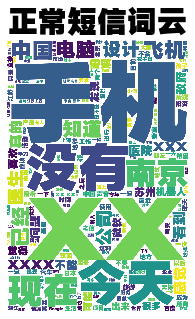

In [31]:
# 导入背景轮廓图用
import PIL .Image as image

messages_parsed = pd.concat([train_parsed_df, parsed_df_wolabel], ignore_index = True)
messages_parsed.drop_duplicates(subset = None, inplace = True)
messages_parsed = messages_parsed.reset_index(drop = True)

# 收集词汇
words_normal = ' '.join(messages_parsed[messages_parsed['标签'] == 0]['内容'])
print('正常短信词云:')
draw_wordcloud(words_normal, title ='正常短信词云', color='white')

### 正常短信生活气息重一些

垃圾短信词云:


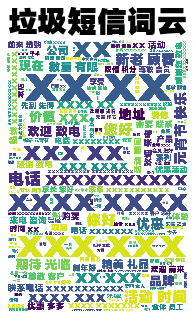

In [32]:
words_spam = ' '.join(messages_parsed[messages_parsed['标签'] == 1]['内容'])
print('垃圾短信词云:')
draw_wordcloud(words_spam, title ='垃圾短信词云', color='white')

### 垃圾短信主要是推销信息

## 3. 文本检索

### 3.1 ElasticSearch 建立搜索引擎

#### 需要安装插件, 在 elasticsearch 目录下执行:
./bin/elasticsearch-plugin install https://github.com/medcl/elasticsearch-analysis-ik/releases/download/v7.7.0/elasticsearch-analysis-ik-7.7.0.zip

In [33]:
# 导入全标签短信
import numpy as np
import pandas as pd
messages = pd.read_csv('所有短信.csv')
messages['内容'].fillna('', inplace = True)
messages

,标签,内容
0,0,商业秘密的秘密性那是维系其商业价值和垄断地位的前提条件之一
1,1,南口阿玛施新春第一批限量春装到店啦   春暖花开淑女裙、冰蓝色公主衫 ...
2,0,带给我们大常州一场壮观的视觉盛宴
3,0,有原因不明的泌尿系统结石等
4,0,23年从盐城拉回来的麻麻的嫁妆
...,...,...
979868,0,所拍数目悉数捐于苏州大观音禅寺
979869,0,之前国内amazon看到有说买到假货
979870,0,无锡市金羿杭金融服务有限公司产品大纲1
979871,0,康大预诊只要你用心做只要下个软件问医生三个问题一个个问还可以发展下家就能赚钱很简单不要交什么...


#### 以下需要启动elasticsearch

In [34]:
# 导入包
from elasticsearch import Elasticsearch
es = Elasticsearch()
# 创建 message 索引
es.indices.delete(index = 'messages', ignore = [400, 404])
es.indices.create(index = 'messages', ignore = 400)
# mapping 分词
mapping = {
    'properties':{
        'content': {
            'type': 'text',
            'analyzer': 'ik_max_word',
            'search_analyzer': 'ik_max_word'
        }
    }
}
result = es.indices.put_mapping(index = 'messages', body = mapping)
result

{'acknowledged': True}

In [35]:
from elasticsearch import helpers
# 按格式写到列表中, 批量添加到 elasticsearch 中
actions = [
    {
        '_index':'messages',
        '_source':
        {
            'label': row['标签'],
            'content': row['内容']
        }
    } for index, row in messages.iterrows()
]
res = helpers.bulk(es, actions)
res

(979873, [])

### 3.2 查询

In [36]:
import json
# 查询函数, querystr 表示用户输入查询关键词, size 表示需要的条数
def es_query(querystr, size = 10):
    dsl = {
        'query':{
            'match':{
                'content': querystr
            }
        }
    }
    # 查询结果
    result = es.search(index = 'messages', body = dsl, size = size)
    contents = []
    # 处理成 tuple, 方便显示结果给用户
    for element in result['hits']['hits']:
        contents.append(
            tuple(
                (element['_source']['content'], 
                 '是' if element['_source']['label'] == 1 else '否',
                 element['_score'])
            )
        )
    queryresult = pd.DataFrame(contents, columns = ['内容', '是否垃圾短信', '相关性分值'])
    return queryresult

In [37]:
es_query('春装到店啦', 5)

,内容,是否垃圾短信,相关性分值
0,原梧高《名店服饰》 新货到！春装到！ 名店新款春衣裳， 俏俏丽人换新装。 全天营业，恭候光临！,是,17.094020
1,南口阿玛施新春第一批限量春装到店啦   春暖花开淑女裙、冰蓝色公主衫 ...,是,17.077433
2,您好：振华商厦五楼THENxRTHFACE（北面）现秋冬装x折优惠，还有新品春装到店，欢迎来选购！,是,16.967121
3,你好姐姐，我是银泰哥弟店长的晓玲，店内亮色新款春装到店，糖果色系春装让您靓丽迷人，多款多色风...,否,15.231396
4,三八女人节唯有宠爱自己，东方广场置地名店旗下倪儿麦新款春装到货啦！x号至八号特推出新款x.x...,是,15.061478


In [38]:
es_query('优惠活动', 5)

,内容,是否垃圾短信,相关性分值
0,您好现在草原铁骨丹有大型的优惠活动,是,15.609194
1,你好 新年好 现飞鹤奶粉有优惠活动,是,15.175663
2,【翼支付】翼支付优惠再次来袭，绿姿蛋糕消费xxx返xx，超市消费每周三xx折。翼支付消费立返...,否,15.118975
3,奶粉x月x日当天x.x折的优惠活动 活动啦 ！！！,否,14.974382
4,新春优惠-回馈活动；一亿红包-任性抢； 详情-上-金-沙-娱-乐【xxxxxx、C xM}；...,是,14.771811


In [39]:
es_query('烧烤 奶茶', 5)

,内容,是否垃圾短信,相关性分值
0,奶茶MM会来南京执掌京东JD+奶茶馆,否,13.459444
1,妈的回徐州老子要看电影看电影看电影看电影看电影看电影吃烧烤吃烧烤吃烧烤吃烧烤吃烧烤吃烧烤,否,12.856813
2,横河觅城鲜饮奶茶店招聘奶茶操作员两名,否,12.078279
3,3、将烧烤酱与酱油、蜂蜜调成烧烤汁,否,11.951901
4,几天前跑去downtown喝奶茶,否,11.768408


In [40]:
es_query('人民大学', 5)

,内容,是否垃圾短信,相关性分值
0,简介为人民大学08金融博士,否,24.427206
1,该男生简介为人民大学xx金融博士,否,22.990513
2,中国人民大学MBA学历&amp,否,22.333730
3,称所有人民大学xxxx届学生中,否,22.333730
4,有质疑称武汉大学的录取通知书“抄袭”了人民大学,否,21.887304


#### 从上面的几个搜索示例来看，我们的分类模型确实是有些保守了
#### 比如我们漏掉了几个不是很明显的垃圾短信
#### 但是我们将正常短信几乎都标记为否，不会耽误用户使用